 # Online Shoppers Purchasing Intention

 ### Name: *AISWARYA PRASAD*
 ### Organization: Entri Elevate
 ### Evaluation date :

## Overview of Problem Statement

Predicting customer purchase behavior is essential for improving e-commerce conversion rates and user experience.
By analyzing browsing data, businesses can identify factors influencing purchases and enhance marketing strategies.

## Objective
 To develop a machine learning model to predict whether an online shopper will complete a purchase. The goal is to leverage session and user behavior data to create an accurate predictive model. The objective is to create an accurate model that aids e-commerce platforms in targeting potential buyers more effectively.

##  Data Description
 Data Source: UCI Machine Learning Repository - Online Shoppers Purchasing Intention Dataset
 - Number of Rows: 12,330
 - Number of Columns: 18
 
***Target Variable: Revenue (1 = Purchase, 0 = No Purchase)***
 
***Key Features:***
 - Administrative, Informational, ProductRelated: Pages visited in respective categories.
 - BounceRates, ExitRates, PageValues: Metrics reflecting engagement and likelihood to buy.
 - SpecialDay: Highlights special events that may influence purchases.
 - Month, OperatingSystems, Browser, Region, TrafficType, VisitorType, Weekend: Session-related categorical attributes.


In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from scipy import stats

## Data Collection

In [3]:
# Load the dataset
data_path = r"C:\Users\asus\Downloads\online_shoppers_intention.csv"
data = pd.read_csv(data_path)

## Overview of the Data

In [4]:
print("Dataset Overview:")
print(data.info())
print("\nFirst 5 rows of data:")
print(data.head())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  Traf

## Data Preprocessing

In [5]:
# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

Missing values in each column:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [7]:
# Handle missing values
data = data.dropna()
print("After handling missing values, dataset shape:", data.shape)

After handling missing values, dataset shape: (12330, 18)


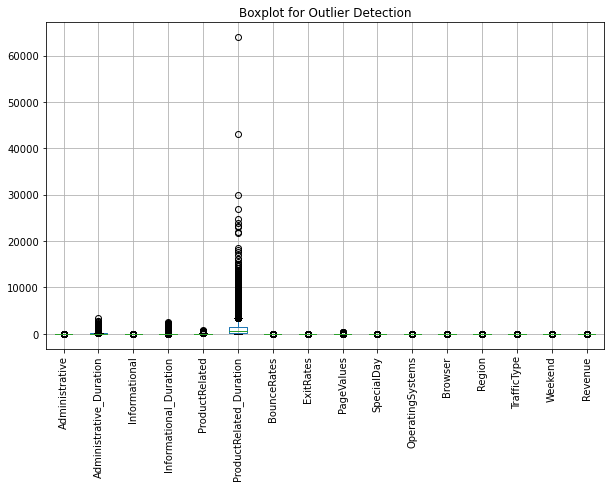

In [8]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
data.boxplot(rot=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

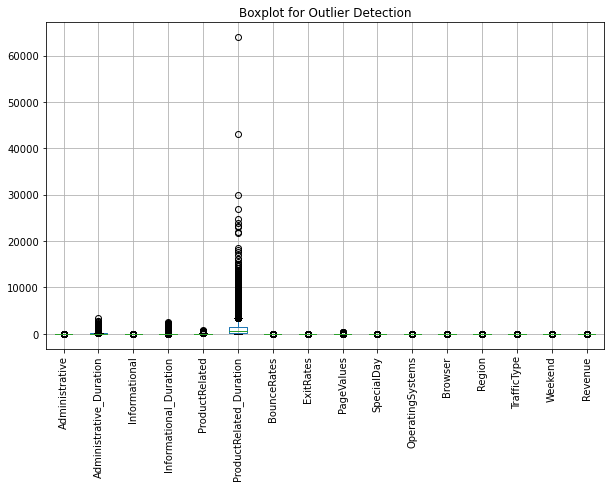

In [9]:
# Check for outliers using boxplot
plt.figure(figsize=(10, 6))
data.boxplot(rot=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

In [13]:
# Check for skewness in numerical features
numerical_features = data.select_dtypes(include=[np.number]).columns
skewness = data[numerical_features].skew()
print("Skewness of numerical features:")
print(skewness)

Skewness of numerical features:
Administrative             1.960357
Administrative_Duration    5.615719
Informational              4.036464
Informational_Duration     7.579185
ProductRelated             4.341516
ProductRelated_Duration    7.263228
BounceRates                2.947855
ExitRates                  2.148789
PageValues                 6.382964
SpecialDay                 3.302667
OperatingSystems           2.066285
Browser                    3.242350
Region                     0.983549
TrafficType                1.962987
dtype: float64


In [18]:
#Address skewed data through log transformation
for feature in numerical_features:
    if data[feature].skew() > 1:
        data[feature] = np.log1p(data[feature])

## Exploratory Data Analysis (EDA)

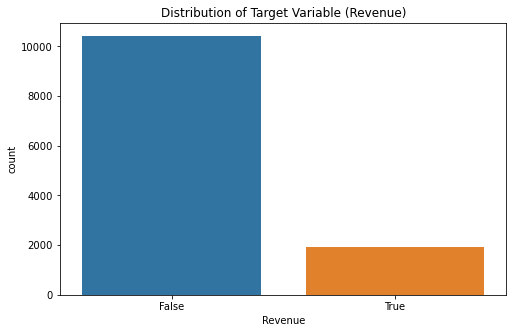

In [19]:
# Plot target variable distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=data)
plt.title('Distribution of Target Variable (Revenue)')
plt.show()

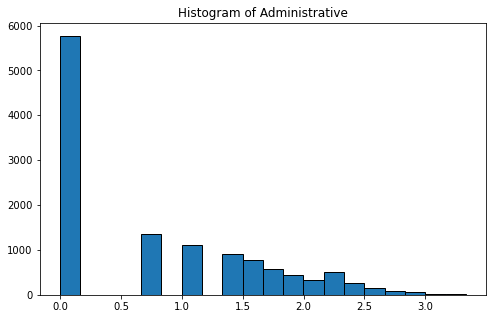

In [24]:
# Histogram
plt.figure(figsize=(8, 5))
plt.hist(data['Administrative'], bins=20, edgecolor='k')
plt.title('Histogram of Administrative')
plt.show()

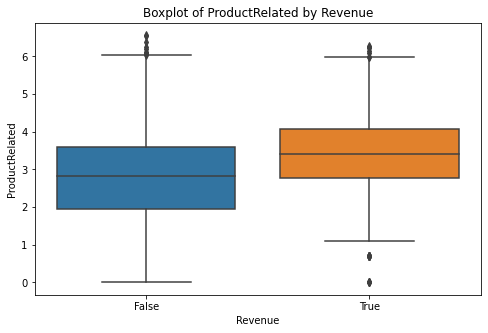

In [25]:
# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Revenue', y='ProductRelated', data=data)
plt.title('Boxplot of ProductRelated by Revenue')
plt.show()

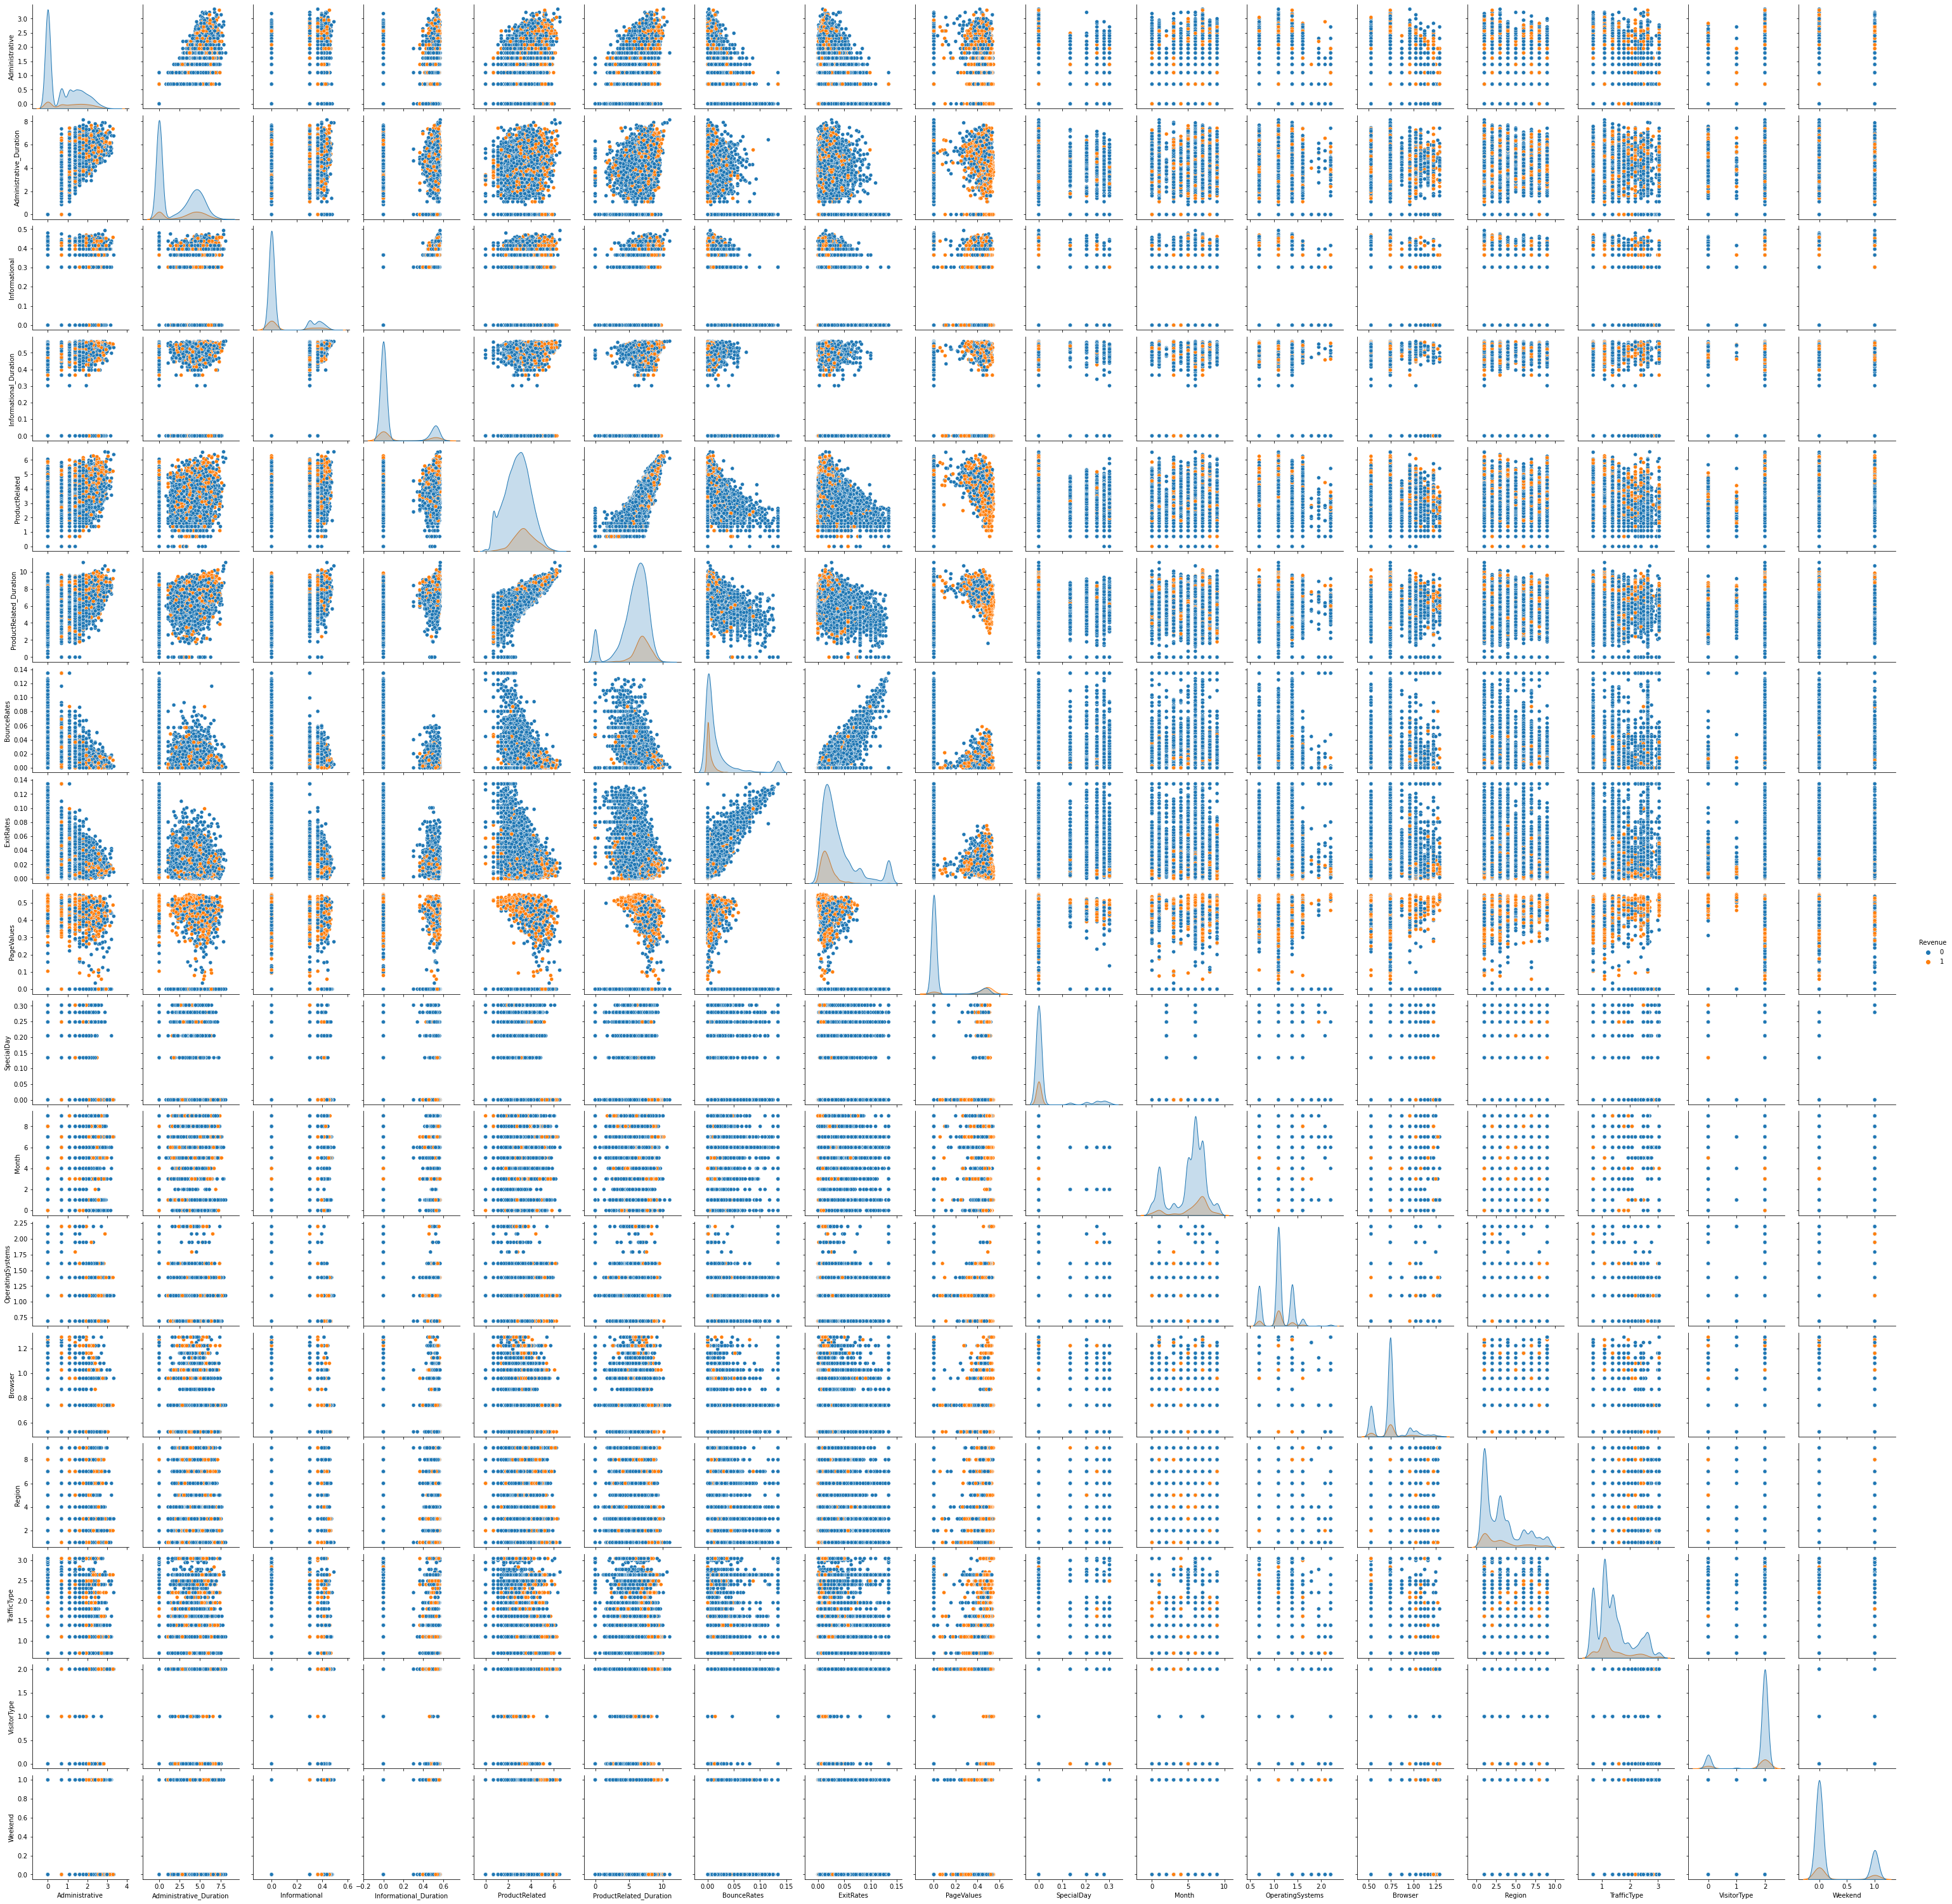

In [44]:
# Pair Plot
sns.pairplot(data, hue='Revenue')
plt.show()

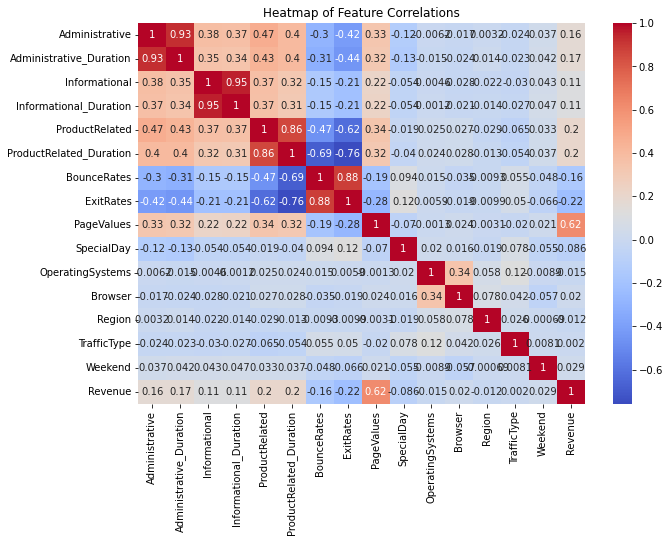

In [20]:
# Correlation heatmap (numerical features)
plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

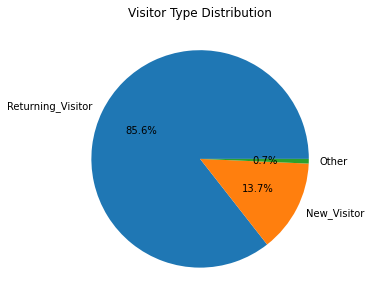

In [27]:
# Pie Chart
plt.figure(figsize=(8, 5))
data['VisitorType'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Visitor Type Distribution')
plt.ylabel('')
plt.show()

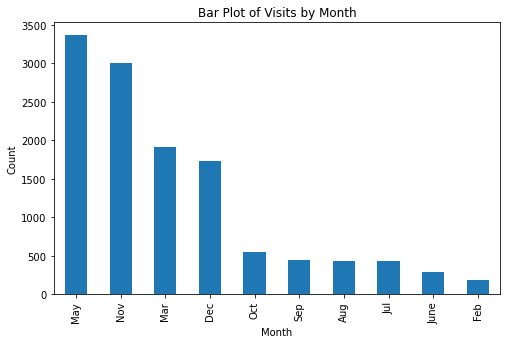

In [28]:
# Bar Plot
plt.figure(figsize=(8, 5))
data['Month'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Visits by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

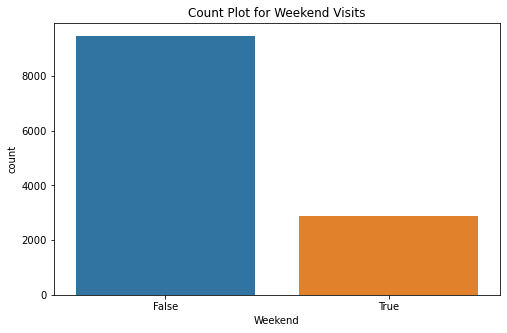

In [29]:
# Count Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='Weekend', data=data)
plt.title('Count Plot for Weekend Visits')
plt.show()

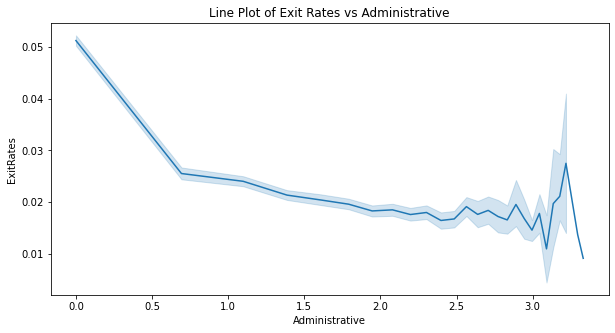

In [30]:
# Line Plot
plt.figure(figsize=(10, 5))
sns.lineplot(x='Administrative', y='ExitRates', data=data)
plt.title('Line Plot of Exit Rates vs Administrative')
plt.show()

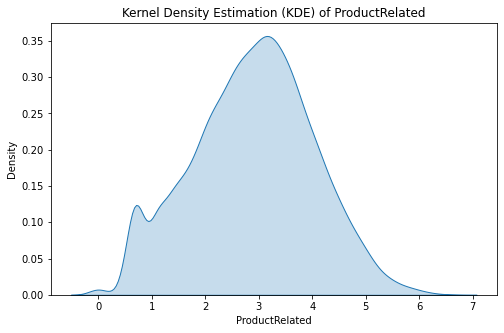

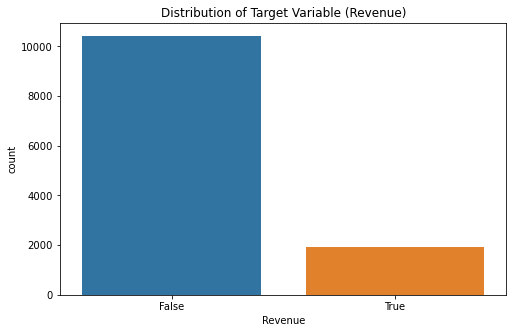

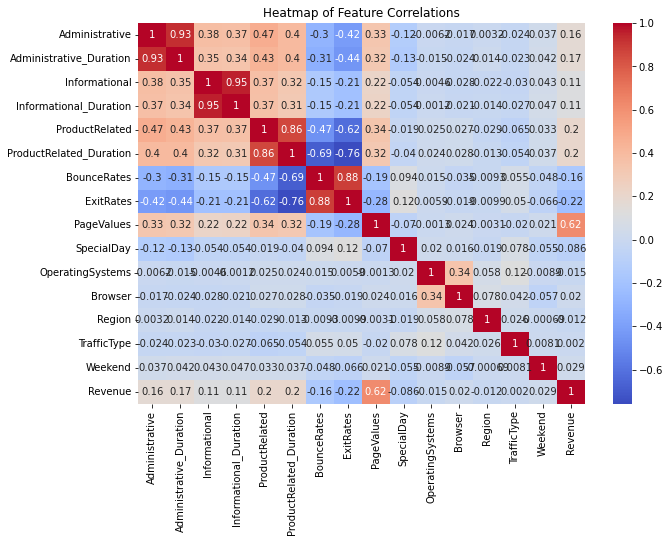

ValueError: object arrays are not supported

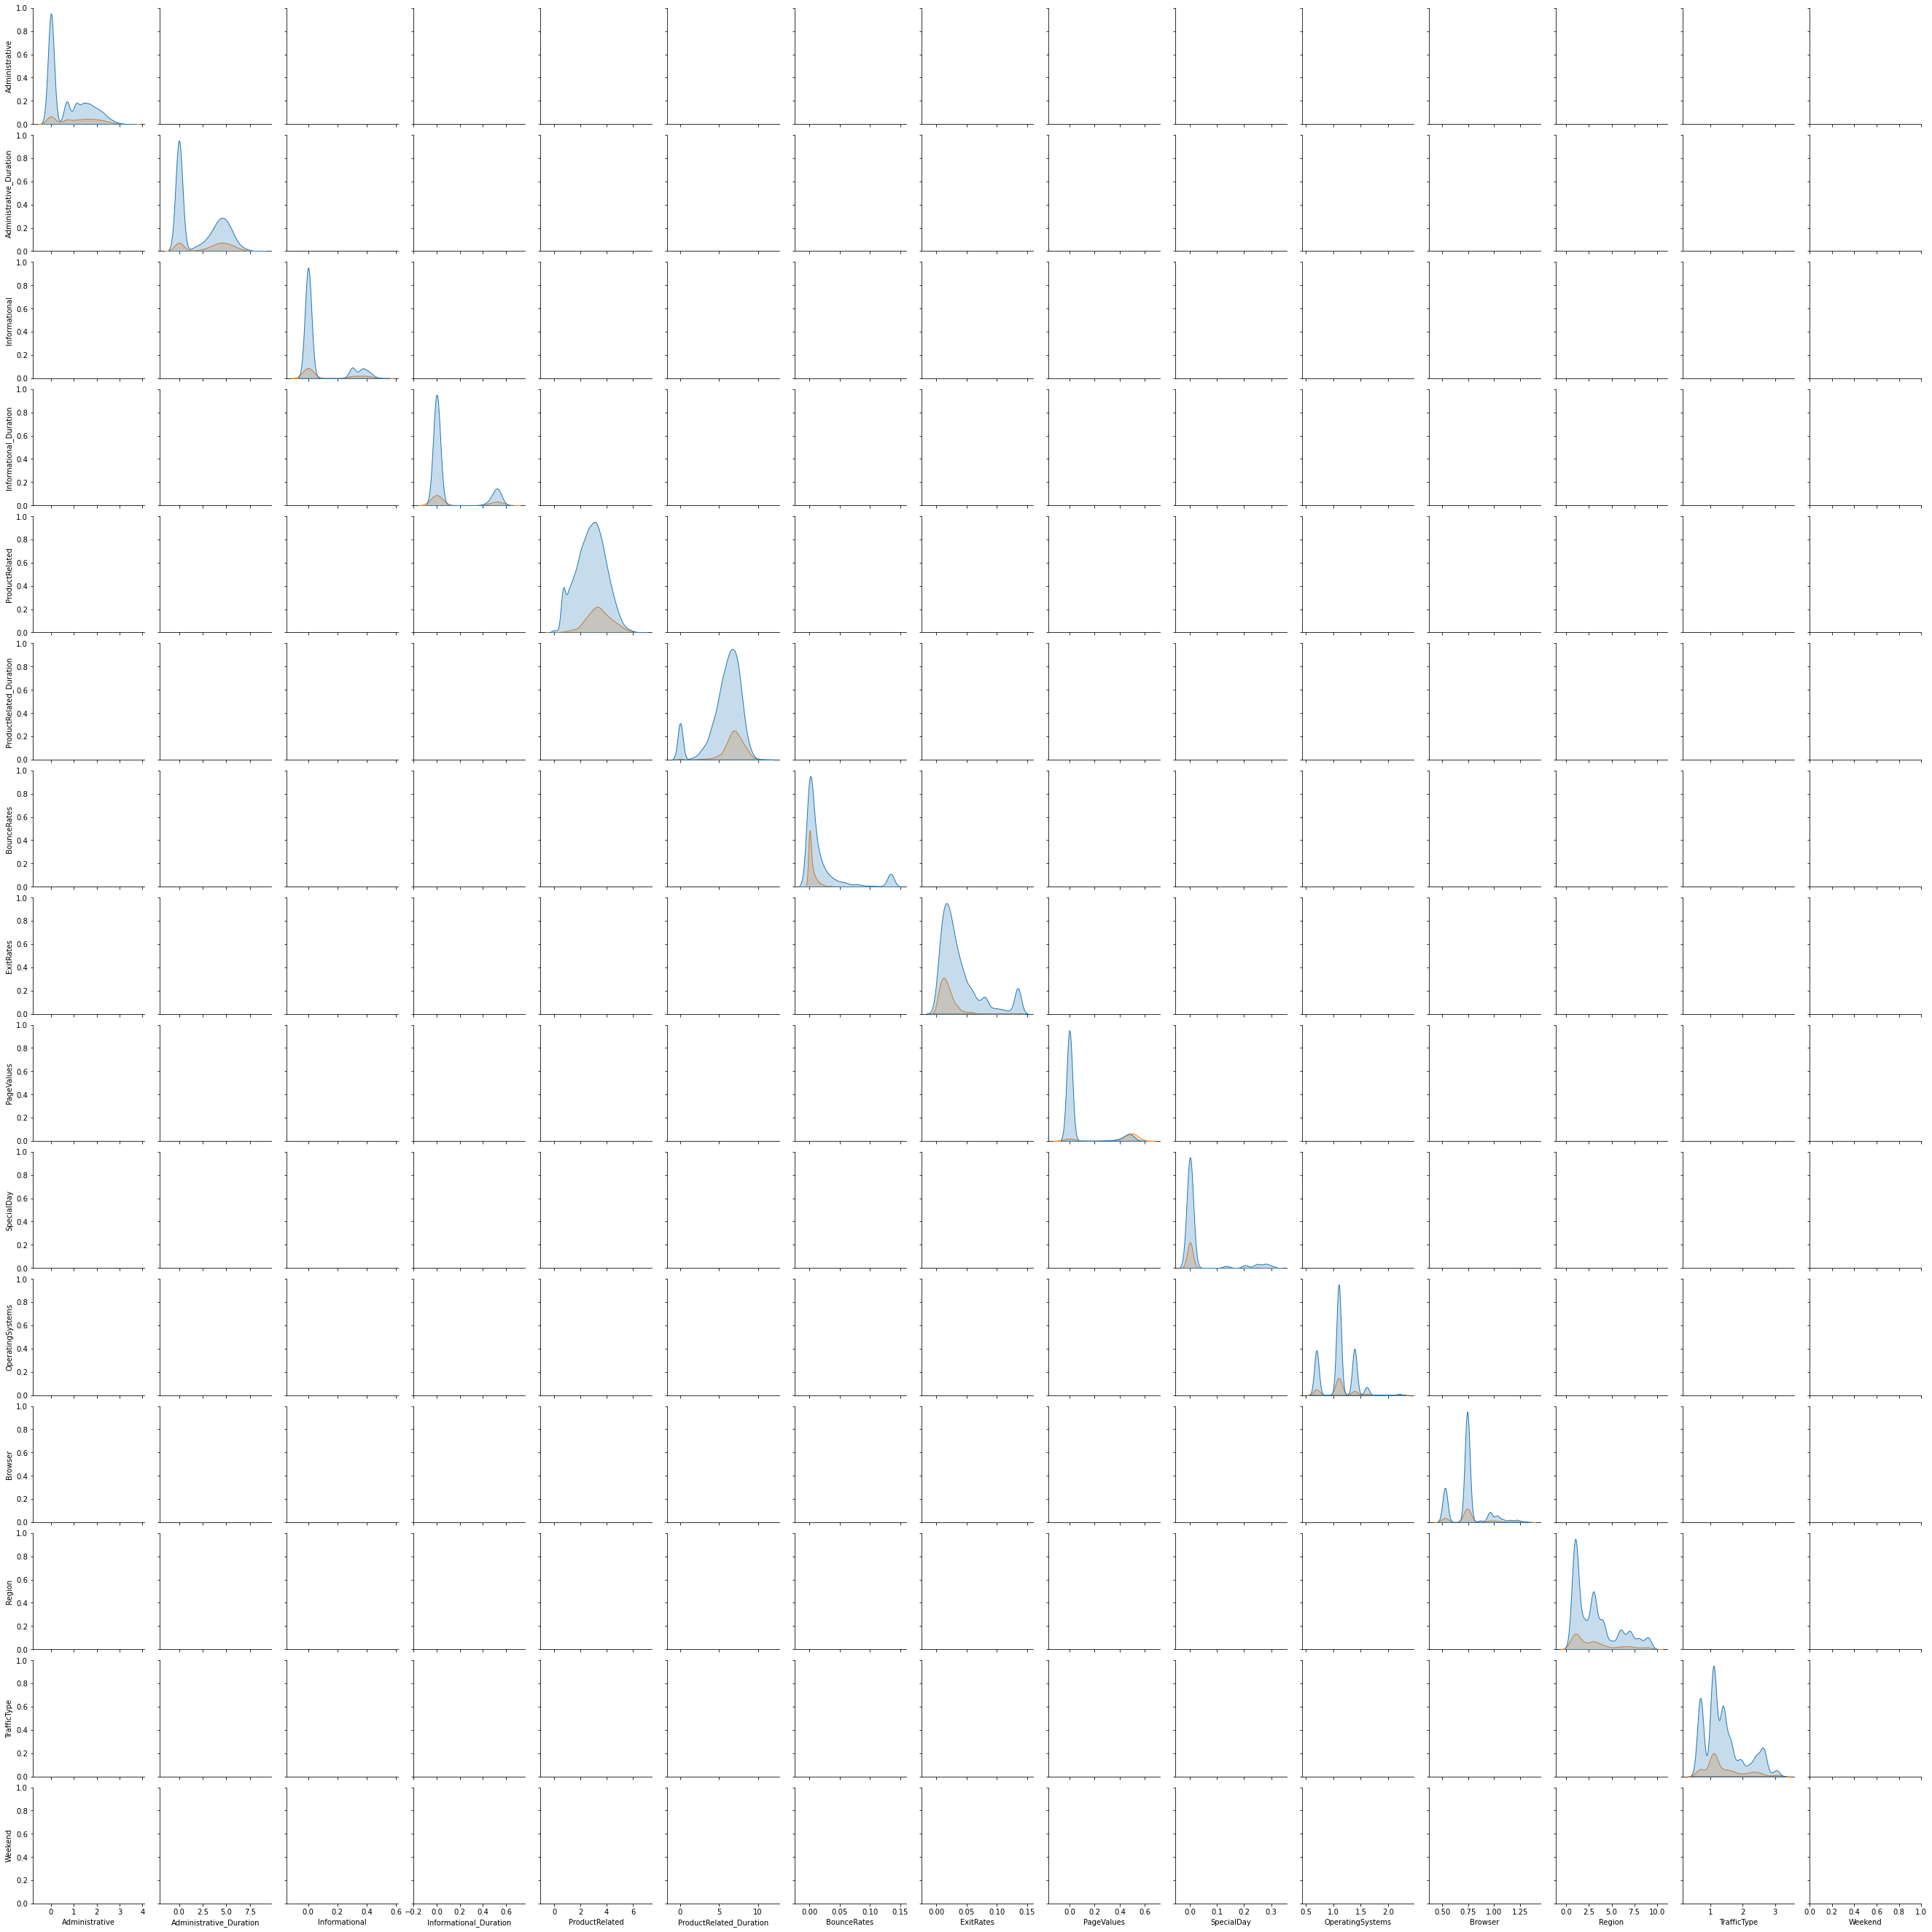

In [31]:
# KDE Plot
plt.figure(figsize=(8, 5))
sns.kdeplot(data['ProductRelated'], shade=True)
plt.title('Kernel Density Estimation (KDE) of ProductRelated')
plt.show()
plt.figure(figsize=(8, 5))
sns.countplot(x='Revenue', data=data)
plt.title('Distribution of Target Variable (Revenue)')
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

sns.pairplot(data, hue='Revenue')

plt.show()

## Feature Engineering

In [41]:
categorical_cols = ['Month', 'VisitorType', 'Weekend']
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

# Encode target variable
data['Revenue'] = encoder.fit_transform(data['Revenue'])

print("Categorical columns encoded successfully!")
print("Sample of encoded columns:", data[categorical_cols].head())

Categorical columns encoded successfully!
Sample of encoded columns:    Month  VisitorType  Weekend
0      2            2        0
1      2            2        0
2      2            2        0
3      2            2        0
4      2            2        1


## Feature Selection

In [42]:
X = data.drop('Revenue', axis=1)
y = data['Revenue']
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

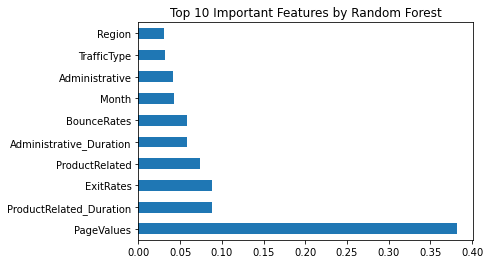

In [43]:
# Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features by Random Forest')
plt.show()

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42)

## Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nData Preprocessing and Feature Selection Completed.")